In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [39]:
data=pd.read_csv('train.csv',sep=',')

In [40]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
y=data.Survived

In [43]:
data=data.drop(['Name','PassengerId','Cabin','Ticket','Survived'],axis=1)
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [44]:
from sklearn.impute import SimpleImputer

In [45]:
mean_imputer=SimpleImputer(strategy='mean')

In [46]:
data['Age']=mean_imputer.fit_transform(data[['Age']])
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [47]:
mf_imputer=SimpleImputer(strategy='most_frequent')

In [48]:
data['Embarked']=mf_imputer.fit_transform(data[['Embarked']])

In [49]:
#bins=np.arange(0,55,10)

In [50]:
#data['AgeBucket']=pd.cut(data.Age,bins=bins)

In [51]:
#data

In [52]:
data=pd.get_dummies(data,columns=['Sex','Pclass','Embarked'])

In [53]:
datamo

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.000000,1,0,53.1000,1,0,1,0,0,0,0,1
4,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,0,1,0,0,0,1
887,19.000000,0,0,30.0000,1,0,1,0,0,0,0,1
888,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1
889,26.000000,0,0,30.0000,0,1,1,0,0,1,0,0


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2)

In [56]:
x_train

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
179,36.0,0,0,0.0000,0,1,0,0,1,0,0,1
607,27.0,0,0,30.5000,0,1,1,0,0,0,0,1
11,58.0,0,0,26.5500,1,0,1,0,0,0,0,1
150,51.0,0,0,12.5250,0,1,0,1,0,0,0,1
421,21.0,0,0,7.7333,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
314,43.0,1,1,26.2500,0,1,0,1,0,0,0,1
688,18.0,0,0,7.7958,0,1,0,0,1,0,0,1
141,22.0,0,0,7.7500,1,0,0,0,1,0,0,1
117,29.0,1,0,21.0000,0,1,0,1,0,0,0,1


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [64]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}

In [65]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
y_hat=model.predict(x_test)

In [68]:
y_hat

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test,y_hat)

array([[91, 22],
       [22, 44]], dtype=int64)

In [76]:
from sklearn.tree import plot_tree

[Text(0.5849183097718254, 0.9791666666666666, 'X[4] <= 0.5\ngini = 0.475\nsamples = 712\nvalue = [436, 276]'),
 Text(0.3885866195436508, 0.9375, 'X[0] <= 6.5\ngini = 0.3\nsamples = 457\nvalue = [373, 84]'),
 Text(0.33491443452380953, 0.8958333333333334, 'X[1] <= 2.5\ngini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(0.32697792658730157, 0.8541666666666666, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.34285094246031744, 0.8541666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.44225880456349204, 0.8958333333333334, 'X[6] <= 0.5\ngini = 0.268\nsamples = 439\nvalue = [369, 70]'),
 Text(0.3587239583333333, 0.8541666666666666, 'X[3] <= 51.698\ngini = 0.184\nsamples = 342\nvalue = [307, 35]'),
 Text(0.28490823412698413, 0.8125, 'X[9] <= 0.5\ngini = 0.172\nsamples = 327\nvalue = [296, 31]'),
 Text(0.20473710317460317, 0.7708333333333334, 'X[3] <= 26.125\ngini = 0.153\nsamples = 287\nvalue = [263, 24]'),
 Text(0.19680059523809523, 0.7291666666666666, 'X[0] <= 12.5\ngi

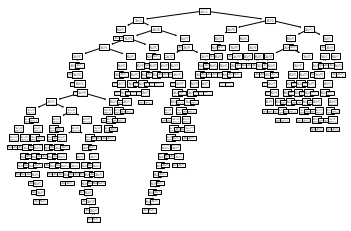

In [77]:
plot_tree(model)